<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li></ul></div>

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

<div style="border:solid blue 1px; padding: 20px">
    
**Приветствую, Никита!**
</div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Для разнообразия полезно использовать метод sample  с зафиксированным random_state--- будет отображать случайные строки из выборки
</div>

In [3]:
df = df.resample('1H').sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB
None


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
На всякий случай, стоило проверить на дубликаты
</div>

* Данные представляют из себя таблицу, состоящую из двух столбцов и 26496 строк
* Даты с 01.03.2018 по 31.08.2018
* После ресемплирования по одному часу строк стало 4416

## Анализ

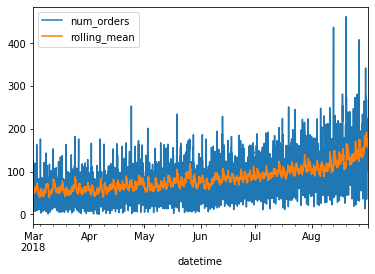

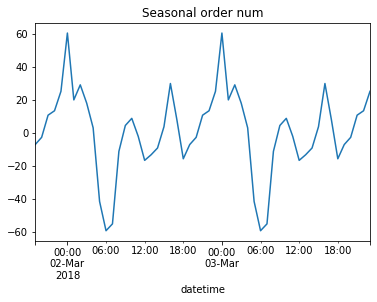

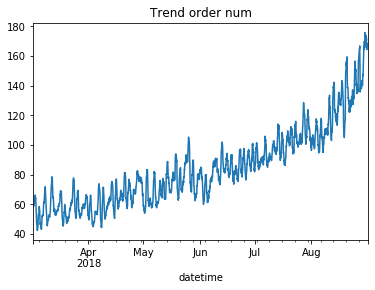

In [4]:
df['rolling_mean'] = df.rolling(20).mean()
df.plot()
plt.show()
decomposed = seasonal_decompose(df.dropna()['num_orders'])
decomposed.seasonal['2018-03-01':'2018-03-03'].plot()
plt.title('Seasonal order num')
plt.show()
decomposed.trend.plot()
plt.title('Trend order num')
plt.show()

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, что рассмотрел данные на более мелком промежутке. Сразу видна цикличность в данных
</div>

* Впринципе на графике скользящего среднего уже заметен тренд на рост заказов, что также подтверждается на графике с декомпозицией тренда. Видимо сервис привлекает все большее число клиентов
* А вот сезонность еще интереснее. Пик заказов приходится ближе к полночи, а минимум около 6 утра, когда рейсов видимо становится меньше
* В целом временной ряд нестационарный, т.к. как минимум меняется среднее

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Верный анализ, молодец
</div>

## Обучение

In [5]:
def make_features(df, max_lag, rolling_mean_size):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Функция написана верно, молодец!
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
хм, а фича - год заказа -- модели чем-то поможет?</div>

<div style="border:solid blue 1px; padding: 20px">
    
Верно, убрал.
</div>

In [6]:
df_temp = df.copy()
make_features(df_temp, 24, 5)
df_temp = df_temp.dropna()
target = df_temp['num_orders']
features = df_temp.drop(['num_orders'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=12345, shuffle=False)

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Нет пояснения, почему выбраны 6 и 10</div>

<div style="border:solid blue 1px; padding: 20px">
    
Хорошее замечание. Вот `max_lag` поменял на 24, т.к. думаю, что при суточной сезонности (согласно анализу) и частоте 1час нужна как минимум эта цифра, т.е. чтобы текущий шаг "видел" остальные. А скользящее среднее наверное нужно поменьше сделать, около 5ти иначе мы при нашем шаге и сезонности внутридневной просто её не заметим
    
И кстати после того как поменял эти параметры RMSE упала ниже 48 для все моделей. Спасибо!
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Да, 24 очень логично выглядит, насчет скользяшего среднего сам точно не знаю. Тут можно было подбирать его как мы подбираем гиперпараметры
</div>

<div class="alert alert-danger">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Забыл указать, shuffle=False, мы ведь не хотим шафлить данные
</div>

<div style="border:solid blue 1px; padding: 20px">
    
Случайно затер, но уже вернул
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Теперь гут!)
</div>

* Создали функцию make_features, а также разбили данные на тестовую и обучающую выборки в размере 1:9

## Тестирование

In [7]:
print("Среднее количество заказов в час:", df['num_orders'].mean())
pred_mean = np.ones(target_test.count()) * target_train.mean()
print("RMSE по среднему значению ряда:", mean_squared_error(pred_mean, target_test)**0.5)

pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]
print("RMSE по предыдущему значению ряда:", mean_squared_error(pred_previous, target_test)**0.5)

Среднее количество заказов в час: 84.42278079710145
RMSE по среднему значению ряда: 84.68768287118466
RMSE по предыдущему значению ряда: 58.881776776551476


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Круто, что реализовал дамми модели для сравнения, молодец!</div>

In [10]:
model = LinearRegression()
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print("RMSE LinearRegression обучающей выборки :", mean_squared_error(pred_train, target_train)**0.5)
print("RMSE LinearRegression тестовой выборки: ", mean_squared_error(pred_test, target_test)**0.5)

RMSE LinearRegression обучающей выборки : 25.824713299765506
RMSE LinearRegression тестовой выборки:  45.542447455062074


In [11]:
tscv = TimeSeriesSplit()
my_cv = TimeSeriesSplit(n_splits=2).split(features_train)
my_r2_scorer = make_scorer(r2_score)
tuned_parameters = {'n_estimators': [10, 500], 
                    'max_depth': [1, 50],
                    'max_leaf_nodes': [500,1000],
                    'min_samples_split': [2, 6],
                    'random_state': [12345],
                    'max_features': ["auto", "sqrt", "log2"],
                    'bootstrap': [False]}
gsearch = GridSearchCV(RandomForestRegressor(), 
                       param_grid=tuned_parameters, 
                       cv=my_cv, 
                       verbose=1, 
                       n_jobs=-1, 
                       scoring=my_r2_scorer,
                       error_score='raise') # 
gsearch.fit(features_train, target_train)


Fitting 2 folds for each of 48 candidates, totalling 96 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:784: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.9min finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f63de36ded0>,
             error_score='raise',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_j...
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
      

In [12]:
pred_train = gsearch.predict(features_train)
print("RMSE best gsearch обучающей выборки: ", mean_squared_error(pred_train, target_train)**0.5)
pred_test = gsearch.predict(features_test)
print("RMSE best gsearch тестовой выборки: ", mean_squared_error(pred_test, target_test)**0.5)

RMSE best gsearch обучающей выборки:  3.655759765163072
RMSE best gsearch тестовой выборки:  41.98346009433949


<div class="alert alert-danger">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Не хватает подбора гиперпараметров для моделей + попробуй для сравнения еще какую-нибудь деревянную модель рассмотреть:)


P.S сразу подсказка - TimeSeriesSplit
</div>

<div style="border:solid blue 1px; padding: 20px">
    
Добавил, воспользовавшись твоей подсказкой
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Круто было бы визуализировать предсказание и факт - так будет понятно, где модель сильнее всего ошибается
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Да, молодец, что поправил!
</div>

<div style="border:solid blue 1px; padding: 20px">
    
Согласен, добавил. Видно. что модель не повторяет пики на факте. Возможно из-за скользящего среднего. 
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Да, возможно, эти пики ассоциированы с праздниками?
</div>

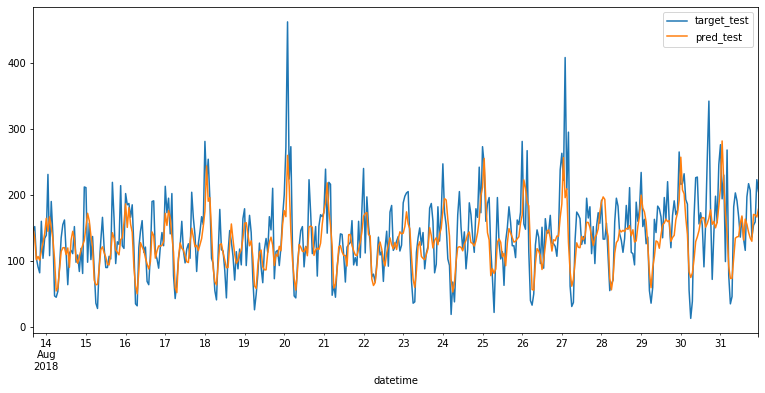

In [13]:
df_plot_result = pd.DataFrame(index=features_test.index, data={'target_test': target_test, 'pred_test': pred_test})
df_plot_result.plot.line(figsize=(13,6))

### Вывод

* Прогнозирование по среднему дает результат лучше чем по предыдущему значению ряда - RMSE 48 против 70
* Для регрессии с параметрами по умолчанию удалось добиться цели RMSE меньше 48. Окончательный результат на тестовой выборке RMSE - 42 заказов, предсказывает гораздо лучше, чем по предыдущему значению ряда, и почти на 6 заказов точнее, чем по среднему значению

## Чек-лист проверки

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

-Спасибо за качественно сделанный проект, было приятно проверять. 

- Видно, что приложено много усилий

- Код написан хорошо 

- Соблюдена структура проекта 
    
- Также оставил пару замечаний и советов

- К сожалению нужно поправить несколько моментов, выделеных красным цветом:
    
    - shuffle
    
    - подбор гиперпараметров
    
    - еще модель

</div>

<div style="border:solid blue 1px; padding: 20px">
    
Никита, спасибо за ревью! Все поправил
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Тебе спасибо за качественную доработку проекта!
    
Удачи в следующих проектах!
</div>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48